<a href="https://colab.research.google.com/github/adphelps/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

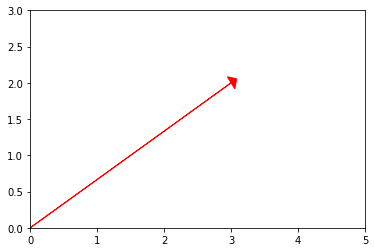

In [5]:
plt.arrow(0, 0, 3, 2, head_width=.2, head_length=0.1, color ='r')
plt.ylim(0, 3)
plt.xlim(0, 5)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [6]:
norm_b = np.sqrt(17**2 + -4**2 + -2**2 + 1**2)
#the norm of a vector is its length
print(norm_b)

16.431676725154983


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [8]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]
np.dot(c, d)
#they are not orthogonal, the dot product =/= 0

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [25]:
mat_e = np.array([[7, 4, 2],
    [1, 3, -1],
    [2, 6, -4]])
print(e)
print('E Transpose: ')
print(mat_e.T)
print('E inverse: ')
print(np.linalg.inv(mat_e))

[[7, 4, 2], [1, 3, -1], [2, 6, -4]]
E Transpose: 
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]
E inverse: 
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [27]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [28]:
customers_mean = np.mean(df.customers)
customers_var = np.var(df.customers)
customers_stdev = np.std(df.customers)
snow_mean = np.mean(df.snow)
snow_var = np.var(df.snow)
snow_stdev = np.std(df.snow)
print('Customer mean, variance and standard deviation:', customers_mean, customers_var, customers_stdev)
print('Snow mean, variance and standard deviation:', snow_mean, snow_var, snow_stdev)

Customer mean, variance and standard deviation: 1135.7142857142858 84653.06122448981 290.95199127087926
Snow mean, variance and standard deviation: 2.7142857142857144 7.346938775510203 2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# They aren't comparable at all. there is far more variance with customers, as well as the number of customers being far bigger to begin with.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [29]:
np.cov(df.customers, df.snow)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [30]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
countries = df.Country
nums = df.drop(columns='Country')
scaler.fit(nums)
cols = scaler.transform(nums).T
df['Cheese'] = cols[0]
df['Carcass_Meat'] = cols[1]
df['Other_Meat'] = cols[2]
df['Fish'] = cols[3]
df['Fats_and_Oils'] = cols[4]
df['Sugars'] = cols[5]
df['Fresh_Potatoes'] = cols[6]
df['Fresh_Veg'] = cols[7]
df['Other_Veg'] = cols[8]
df['Processed_Potatoes'] = cols[9]
df['Processed_Veg'] = cols[10]
df['Fresh_Fruit'] = cols[11]
df['Cereals'] = cols[12]
df['Beverages'] = cols[13]
df['Soft_Drinks'] = cols[14]
df['Alcoholic Drinks'] = cols[15]
df['Confectionery'] = cols[16]
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery,Beverages
0,England,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303,-0.051917
1,Wales,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122,1.609440
2,Scotland,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837,-0.467257
3,North Ireland,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656,-1.090266


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [55]:
from sklearn.decomposition import PCA

features = ['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish', 'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg', 'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals', 'Beverages', 'Soft_Drinks', 
            'Alcoholic Drinks', 'Confectionery', 'Beverages']
x = df.loc[:, features].values
y = df.loc[:, ['Country']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery,Beverages
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303,-0.051917
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122,1.609440
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837,-0.467257
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656,-1.090266


In [67]:
labels = []
for i in range(4):
  labels.append(f'Principal Component {i}')

pca = PCA(4)
components = pca.fit_transform(x)
principaldf = pd.DataFrame(data = components, columns=labels)
principaldf.head()

,Principal Component 0,Principal Component 1,Principal Component 2,Principal Component 3
0,-0.891036,0.395468,1.849182,3.777089e-16
1,-4.822946,-1.678098,-0.758038,3.777089e-16
2,0.654285,3.230281,-0.797330,3.777089e-16
3,5.059698,-1.947651,-0.293813,3.777089e-16


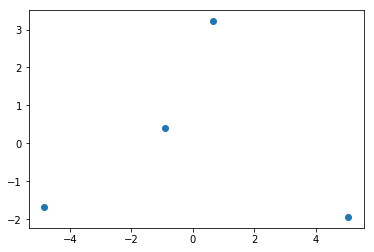

In [68]:
plt.scatter(principaldf['Principal Component 0'], principaldf['Principal Component 1'])

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [70]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


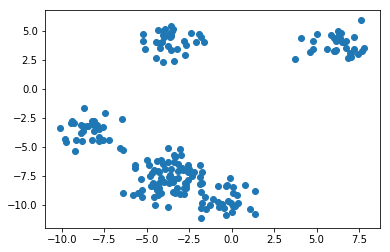

In [75]:
plt.scatter(points.x, points.y)

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
import seaborn as sns

kmeans = KMeans(n_clusters = 5)
kmeans.fit(points)
labels = kmeans.labels_

In [85]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,4
1,-3.554323,-6.884729,3
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,4
4,-0.804026,-9.704457,0


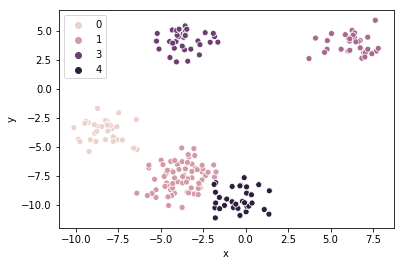

In [83]:
sns.scatterplot(x='x', y='y', hue=labels, data=points);